In [1]:
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import numpy as np
from numpy import linalg as LA
from numpy import arange
import pandas as pd

import sklearn
from sklearn.datasets.mldata import fetch_mldata
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [3]:
iris=pd.read_csv("C:\\Users\\amgupta\\OneDrive - Microsoft\\Python_Temp\\11\\Iris.csv")

In [4]:
iris

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
5      6            5.4           3.9            1.7           0.4   
6      7            4.6           3.4            1.4           0.3   
7      8            5.0           3.4            1.5           0.2   
8      9            4.4           2.9            1.4           0.2   
9     10            4.9           3.1            1.5           0.1   
10    11            5.4           3.7            1.5           0.2   
11    12            4.8           3.4            1.6           0.2   
12    13            4.8           3.0            1.4           0.1   
13    14            4.3           3.0            1.1           0.1   
14    15            5.8           4.0            1.2           0.2   
15    16            5.7           4.4            1.5           0.4   
16    17            5.4           3.9            1.3           0.4   
17    18            5.1           3.5            1.4           0.3   
18    19            5.7           3.8            1.7           0.3   
19    20            5.1           3.8            1.5           0.3   
20    21            5.4           3.4            1.7           0.2   
21    22            5.1           3.7            1.5           0.4   
22    23            4.6           3.6            1.0           0.2   
23    24            5.1           3.3            1.7           0.5   
24    25            4.8           3.4            1.9           0.2   
25    26            5.0           3.0            1.6           0.2   
26    27            5.0           3.4            1.6           0.4   
27    28            5.2           3.5            1.5           0.2   
28    29            5.2           3.4            1.4           0.2   
29    30            4.7           3.2            1.6           0.2   
..   ...            ...           ...            ...           ...   
120  121            6.9           3.2            5.7           2.3   
121  122            5.6           2.8            4.9           2.0   
122  123            7.7           2.8            6.7           2.0   
123  124            6.3           2.7            4.9           1.8   
124  125            6.7           3.3            5.7           2.1   
125  126            7.2           3.2            6.0           1.8   
126  127            6.2           2.8            4.8           1.8   
127  128            6.1           3.0            4.9           1.8   
128  129            6.4           2.8            5.6           2.1   
129  130            7.2           3.0            5.8           1.6   
130  131            7.4           2.8            6.1           1.9   
131  132            7.9           3.8            6.4           2.0   
132  133            6.4           2.8            5.6           2.2   
133  134            6.3           2.8            5.1           1.5   
134  135            6.1           2.6            5.6           1.4   
135  136            7.7           3.0            6.1           2.3   
136  137            6.3           3.4            5.6           2.4   
137  138            6.4           3.1            5.5           1.8   
138  139            6.0           3.0            4.8           1.8   
139  140            6.9           3.1            5.4           2.1   
140  141            6.7           3.1            5.6           2.4   
141  142            6.9           3.1            5.1           2.3   
142  143            5.8           2.7            5.1           1.9   
143  144            6.8           3.2            5.9           2.3   
144  145            6.7           3.3            5.7           2.5   
145  146        

In [5]:
#shape
print (iris.shape)

(150, 6)


In [6]:
print(iris.head(10))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


In [7]:
print(iris.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [8]:
print((iris['Species']).unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [9]:
# class distribution
print(iris.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


<Figure size 1944x1440 with 0 Axes>

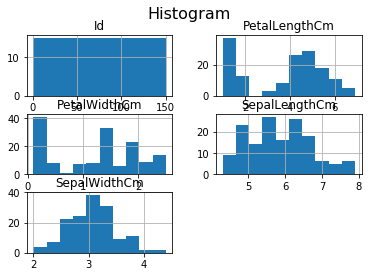

In [10]:
#HISTOGRAMS
fig = plt.figure(figsize=(27,20))

iris.hist()
plt.suptitle("Histogram", fontsize=16) # use suptitle to add title to all sublots plt.show()

plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021261BB23C8>,
      dtype=object)

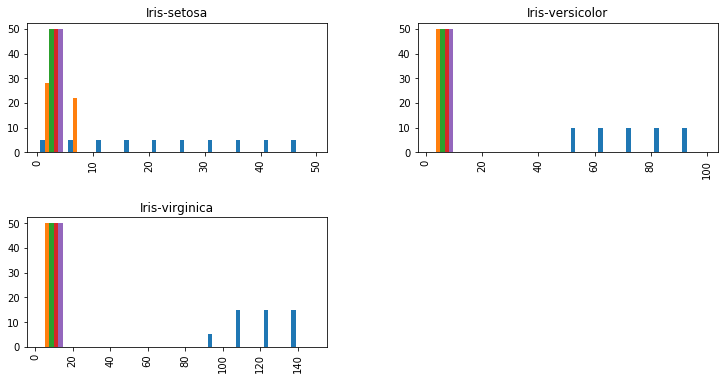

In [11]:
iris.hist(by="Species", figsize=(12, 6))

Now Let's See Scatter Plot

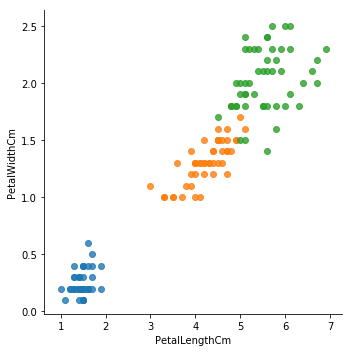

In [13]:
sns.lmplot(x="PetalLengthCm", y="PetalWidthCm", data=iris, hue="Species", fit_reg=False, legend=False)

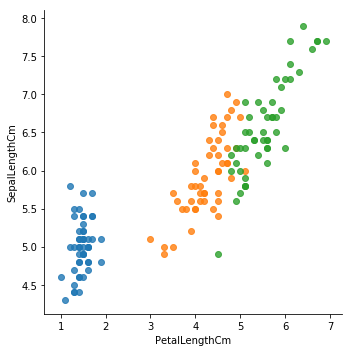

In [14]:
sns.lmplot(x="PetalLengthCm", y="SepalLengthCm", data=iris, hue="Species", fit_reg=False, legend=False)

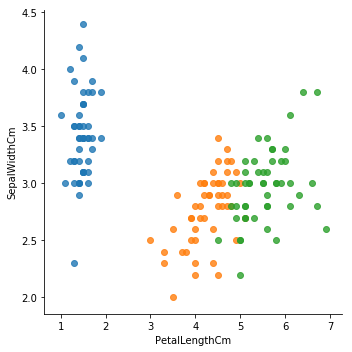

In [15]:
sns.lmplot(x="PetalLengthCm", y="SepalWidthCm", data=iris, hue="Species", fit_reg=False, legend=False)

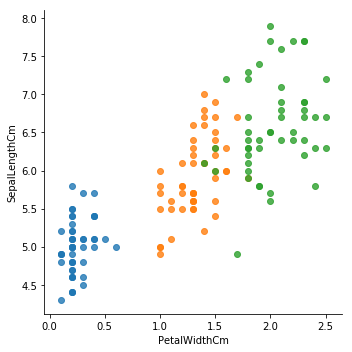

In [16]:
sns.lmplot(x="PetalWidthCm", y="SepalLengthCm", data=iris, hue="Species", fit_reg=False, legend=False)

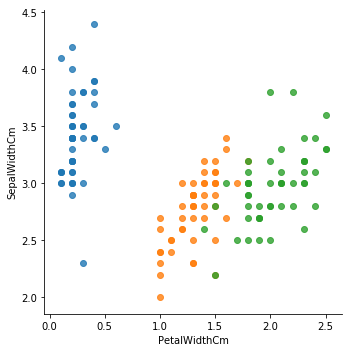

In [17]:
sns.lmplot(x="PetalWidthCm", y="SepalWidthCm", data=iris, hue="Species", fit_reg=False, legend=False)

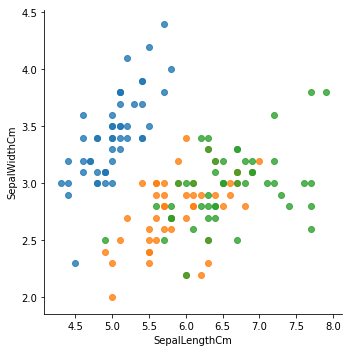

In [18]:
sns.lmplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, hue="Species", fit_reg=False, legend=False)

Petal Length and Petal width has maximum seperation of classes

In [21]:
from sklearn.preprocessing import StandardScaler
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
# Separating out the features
x = iris.loc[:, features].values

# Separating out the target
y = iris.loc[:,['Species']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [22]:
print(x)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [24]:
print(principalDf)

     principal component 1  principal component 2
0                -2.264542               0.505704
1                -2.086426              -0.655405
2                -2.367950              -0.318477
3                -2.304197              -0.575368
4                -2.388777               0.674767
5                -2.070537               1.518549
6                -2.445711               0.074563
7                -2.233842               0.247614
8                -2.341958              -1.095146
9                -2.188676              -0.448629
10               -2.163487               1.070596
11               -2.327378               0.158587
12               -2.224083              -0.709118
13               -2.639716              -0.938282
14               -2.192292               1.889979
15               -2.251465               2.722371
16               -2.202750               1.513750
17               -2.190179               0.514304
18               -1.894074               1.431111


Visualize 2D Projection

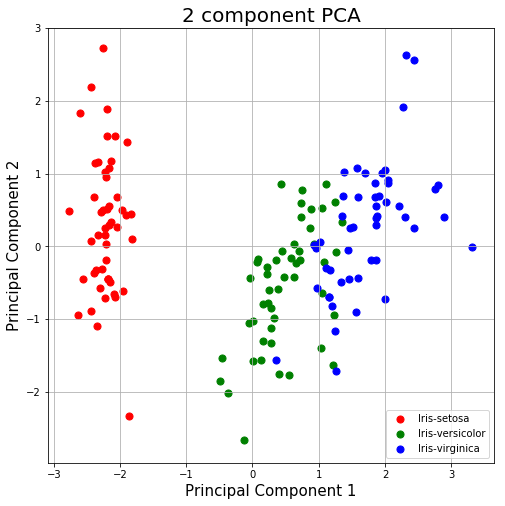

In [26]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = iris['Species'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()